In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data=data.iloc[:,2:4]

In [5]:
data

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


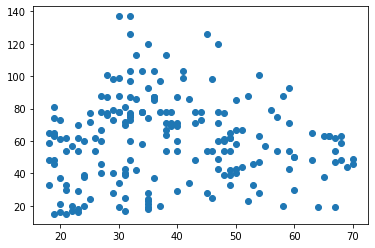

In [6]:
plt.scatter(data["Age"],data["Annual Income (k$)"])

In [7]:
from sklearn.preprocessing import normalize
scaled=normalize(data)
scaled=pd.DataFrame(scaled,columns=data.columns)
scaled.head()

,Age,Annual Income (k$)
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


Text(0, 0.5, 'Euclidian distace')

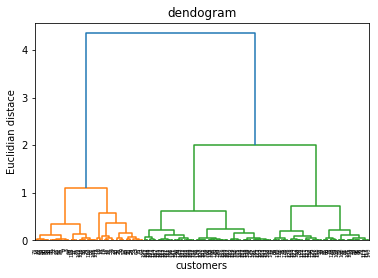

In [8]:
#dendogram
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(scaled,method="ward"))
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("Euclidian distace")

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2)
y_predict=hc.fit_predict(data)

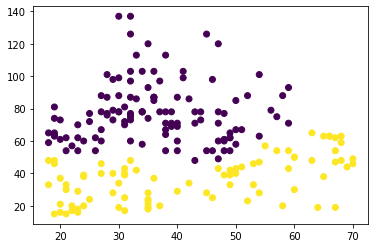

In [10]:
plt.scatter(data["Age"],data["Annual Income (k$)"],c=hc.labels_)

In [13]:
from sklearn.metrics import silhouette_score #silhouette_score is used for accuracy in the unsupervised learning

In [16]:
silhouette_score(data,y_predict)

0.4104652474372429